In [1]:
# import the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import validation_curve

In [2]:
iris = sns.load_dataset("iris")
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
 iris["species"].replace(["setosa", "versicolor", "virginica"], [0, 1, 2], inplace= True)
 iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [4]:
iris.shape

(150, 5)

In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [6]:
iris.groupby(["species"]).mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
0,5.006,3.428,1.462,0.246
1,5.936,2.770,4.260,1.326
2,6.588,2.974,5.552,2.026


### an insight on the data :

In [7]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


### data visualization :

<Axes: xlabel='species'>

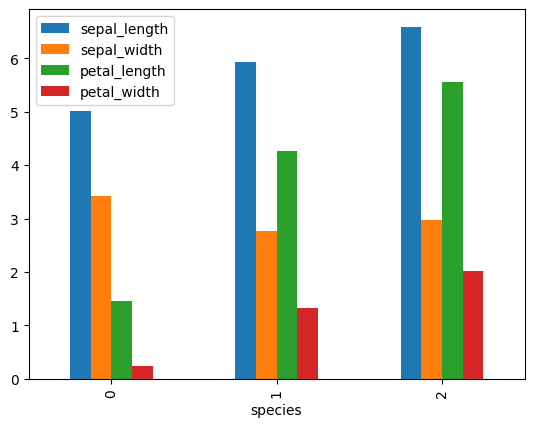

In [8]:
iris.groupby(["species"]).mean().plot.bar()

C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


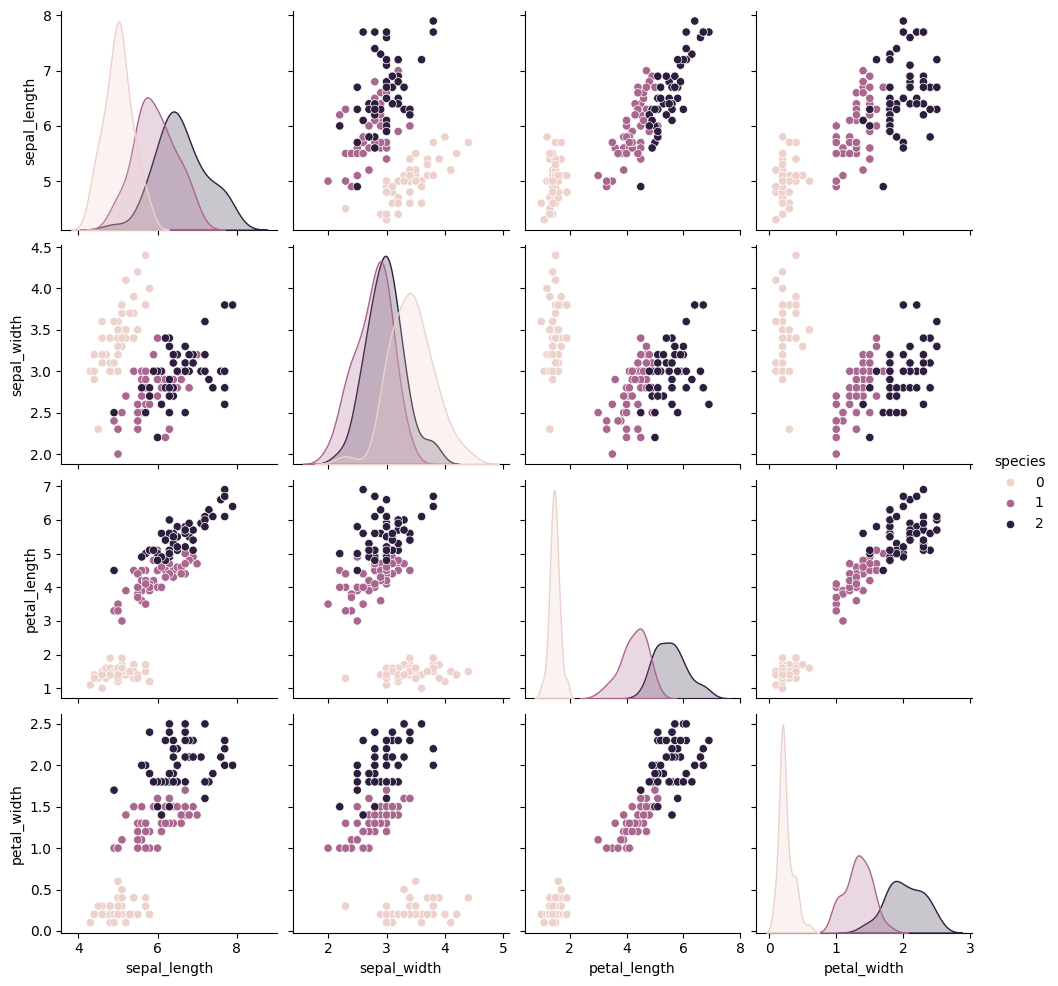

In [9]:
sns.pairplot(iris, hue= "species")

In [10]:
x= iris[["sepal_length", "sepal_width", "petal_length", "petal_width"]]
y= iris["species"]

Text(0, 0.5, 'petal_width')

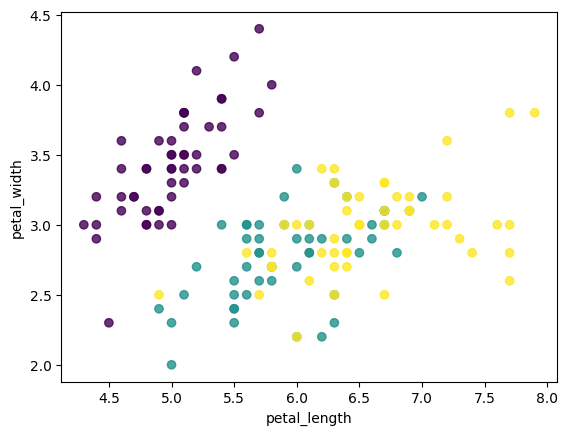

In [11]:
plt.scatter(x["sepal_length"], x["sepal_width"], c=y , alpha = 0.8)
plt.xlabel("petal_length")
plt.ylabel("petal_width")

### splitting the data :

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.5)

In [13]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(75, 4) (75, 4) (75,) (75,)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


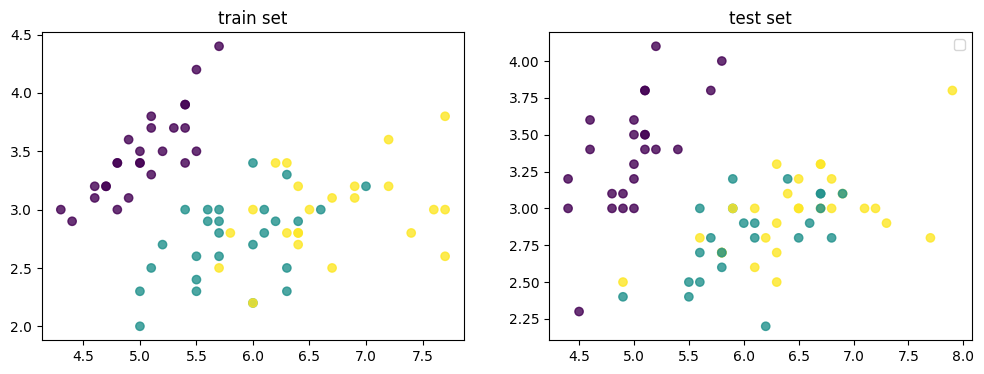

In [14]:
plt.figure(figsize= (12,4))

plt.subplot(1,2,1)
plt.scatter(x_train["sepal_length"], x_train["sepal_width"], c= y_train, alpha = 0.8)
plt.title("train set")

plt.subplot(1,2,2)
plt.scatter(x_test["sepal_length"], x_test["sepal_width"], c= y_test, alpha = 0.8)
plt.title("test set")

plt.legend()
plt.show()

### working on the modal :

In [15]:
# create the KNeighborsClassifier estimator 
model = KNeighborsClassifier()

In [16]:
# train the model
model.fit(x_train, y_train)

KNeighborsClassifier()

In [17]:
# let's see the different values the train_score and val_score according to the change of n_neighbors parametre
k= np.arange(1, 50)
train_score, val_score = validation_curve(model, x_train, y_train, param_name= "n_neighbors", param_range= k, cv= 5)

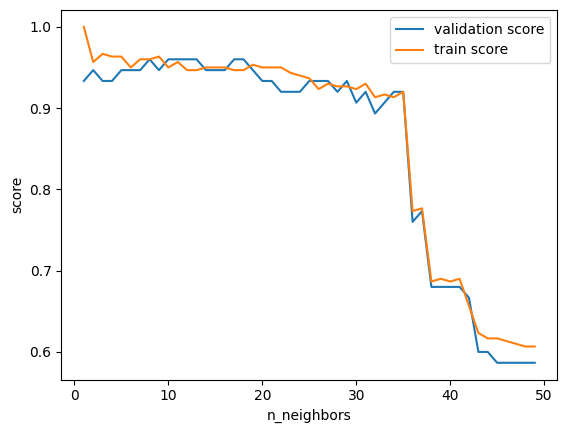

In [18]:
# visualise the train score and test score
plt.plot(k, val_score.mean(axis = 1), label= "validation score")
plt.plot(k, train_score.mean(axis = 1), label= "train score")

plt.xlabel("n_neighbors")
plt.ylabel("score")

plt.legend()
plt.show()

NB : we notice that the train-val scores keep declinig if the parameter we choose is high also the best validation score is when the n_neighbor parameter is between 10 and 20

#### let's see the best score the modal can have when we change the entire hyperparameters :

In [19]:
# fill the param_grid
param_grid = {"n_neighbors": np.arange(1, 50),
              "metric": ["euclidean", "manhattan"]}

In [20]:
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv= 5)

In [21]:
grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [22]:
print(f"the best score : {grid.best_score_}")

the best score : 0.96


In [23]:
print(f"the best parametrs the modal must have to reasch the best score : {grid.best_params_}")

the best parametrs the modal must have to reasch the best score : {'metric': 'euclidean', 'n_neighbors': 8}


In [24]:
# initialise the model with grid
model = grid.best_estimator_

In [25]:
model.score(x_test, y_test)

0.9466666666666667

this was the modal accuracy and it's changeable because of the variation of the split in cross validation

In [26]:
# an exemple to test the K-nearest-neighbor
def prediction(model, sepale_length= 4, sepale_width= 3, petal_length= 1, petal_width= 2) :
    x= np.array([ sepale_length, sepale_width, petal_length, petal_width]).reshape(1, 4)
    print(f"the type of iris flower you got is : {model.predict(x)}")
    # calculate the probability of surviving or not 
    print(model.predict_proba(x))

In [27]:
prediction(model)

the type of iris flower you got is : [0]
[[1. 0. 0.]]


C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
